In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy as sp
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from scipy.signal import detrend



In [2]:
ar_df = pd.read_csv('AR1.csv')
ar_df

,DATE,Y
0,01JUN1983,100.041982
1,01JUL1983,100.324358
2,01AUG1983,100.163269
3,01SEP1983,100.238618
4,01OCT1983,100.136555
...,...,...
195,01SEP1999,100.067329
196,01OCT1999,100.004667
197,01NOV1999,100.180494
198,01DEC1999,100.187570


Text(0.5, 1.0, 'Time Series Example')

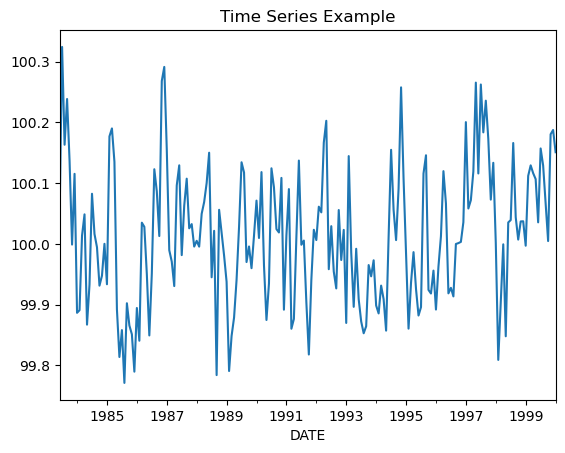

In [3]:
ar_df['DATE'] = pd.to_datetime(ar_df['DATE'], format='%d%b%Y')

ar_ts = pd.Series(ar_df['Y'].values, index=ar_df['DATE'])

ar_ts.plot()
plt.title('Time Series Example')

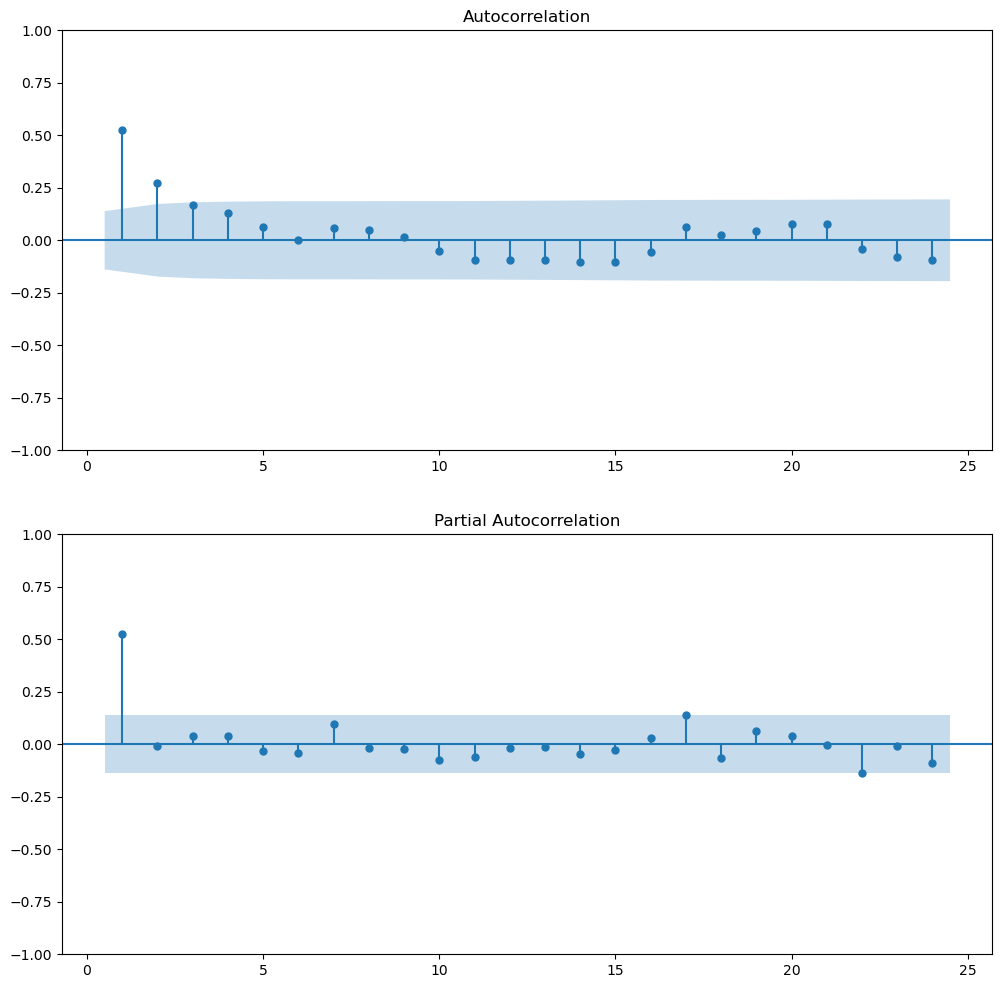

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

plot_acf(ar_ts, ax=ax1, zero=False)
plot_pacf(ar_ts, ax=ax2, zero=False)
plt.show()

In [5]:
adfuller(ar_ts, regression='c')

(-7.727241554642178,
 1.1503064692938177e-11,
 0,
 199,
 {'1%': -3.4636447617687436,
  '5%': -2.8761761179270766,
  '10%': -2.57457158581854},
 -350.18390844342866)

In [6]:
#order=(p,d,q)
fit_ar1 = ARIMA(ar_ts, order=(1,0,0)).fit()

print(fit_ar1.summary())
#Look at ar.L1 row
#P-value tests the null hypothesis: ar.L1 term is not significant
#alternitive: ar.L1 term is needed

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 188.076
Date:                Mon, 30 Sep 2024   AIC                           -370.152
Time:                        10:04:03   BIC                           -360.257
Sample:                    06-01-1983   HQIC                          -366.147
                         - 01-01-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.0147      0.014   6978.574      0.000      99.987     100.043
ar.L1          0.5287      0.067      7.869      0.000       0.397       0.660
sigma2         0.0089      0.001      9.906      0.0

c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


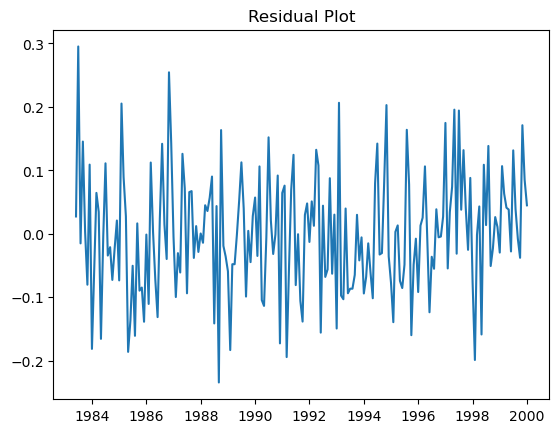

In [7]:
residuals = fit_ar1.resid
plt.plot(residuals)
plt.title('Residual Plot')
plt.show()

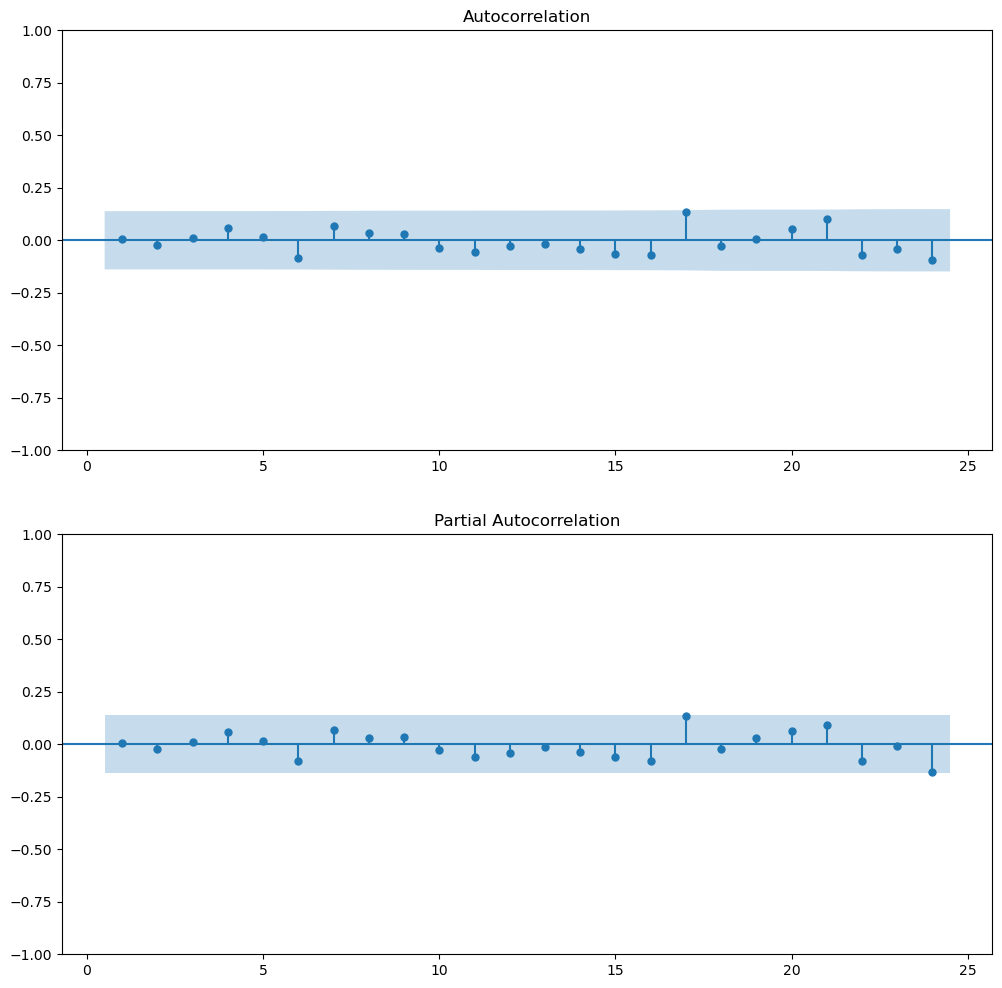

In [8]:
#We need to see if there are any significant values left in the model.
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

plot_acf(residuals, ax=ax1, zero=False)
plot_pacf(residuals, ax=ax2, zero=False)
plt.show()

In [9]:
#Residuals are white noise? Use the Ljungbox test
#P-value is greater than 0.05, the residuals are white noise
#If the residuals are white noise, the spikes in the ACF and PACF should be inside the blue bars
sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,3.980321,0.94823


In [10]:
ar_df2 = pd.read_csv('AR2.csv')
ar_df2

,DATE,Y
0,01JUN1983,99.752610
1,01JUL1983,100.042016
2,01AUG1983,99.919647
3,01SEP1983,100.105049
4,01OCT1983,100.032308
...,...,...
195,01SEP1999,100.268095
196,01OCT1999,100.214019
197,01NOV1999,100.386534
198,01DEC1999,100.375400


In [11]:
ar_df2.isna().sum()

DATE    0
Y       0
dtype: int64

Text(0.5, 1.0, 'AR Time Series')

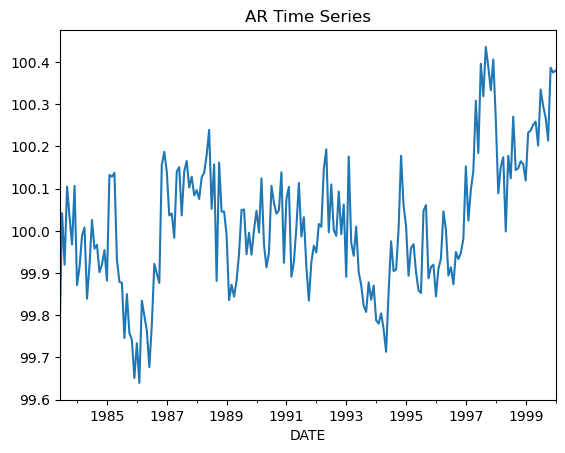

In [12]:
ar_df2['DATE'] = pd.to_datetime(ar_df2['DATE'], format='%d%b%Y')

ar_ts2 = pd.Series(ar_df2['Y'].values, index=ar_df2['DATE'])

ar_ts2.plot()
plt.title('AR Time Series')

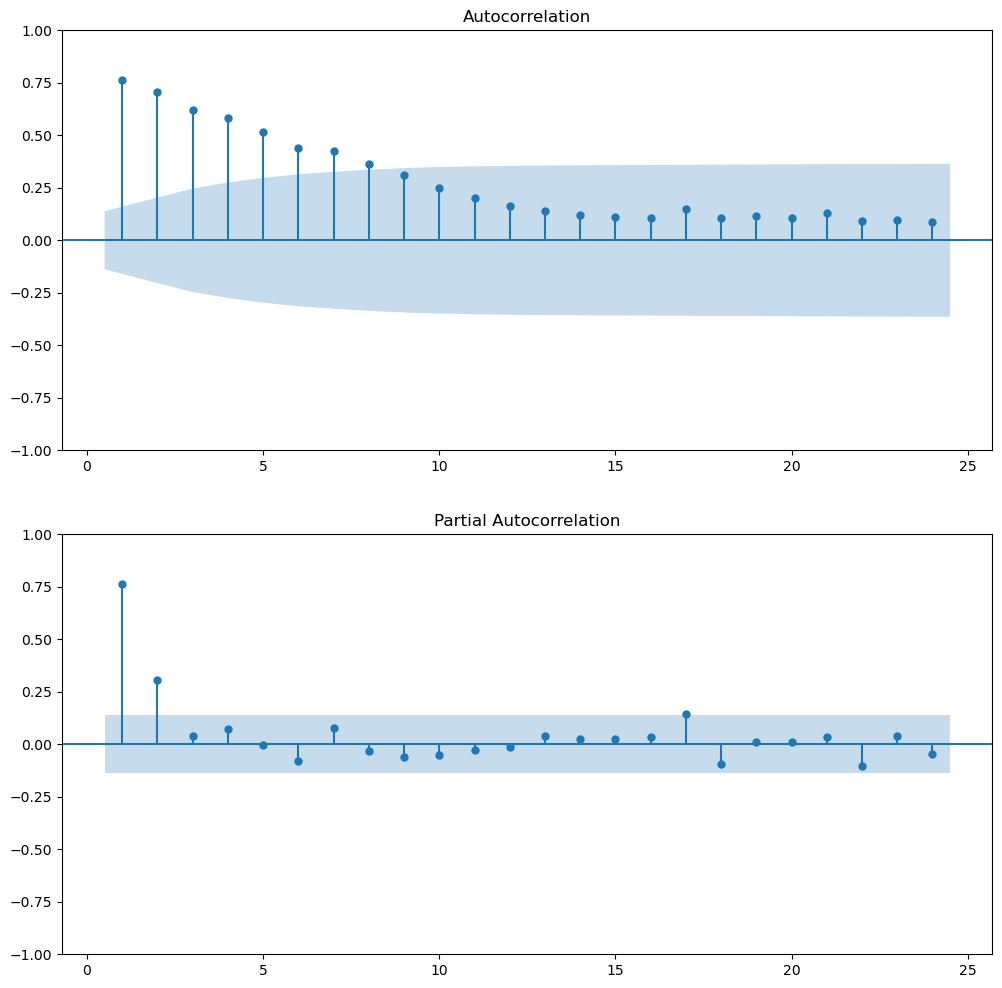

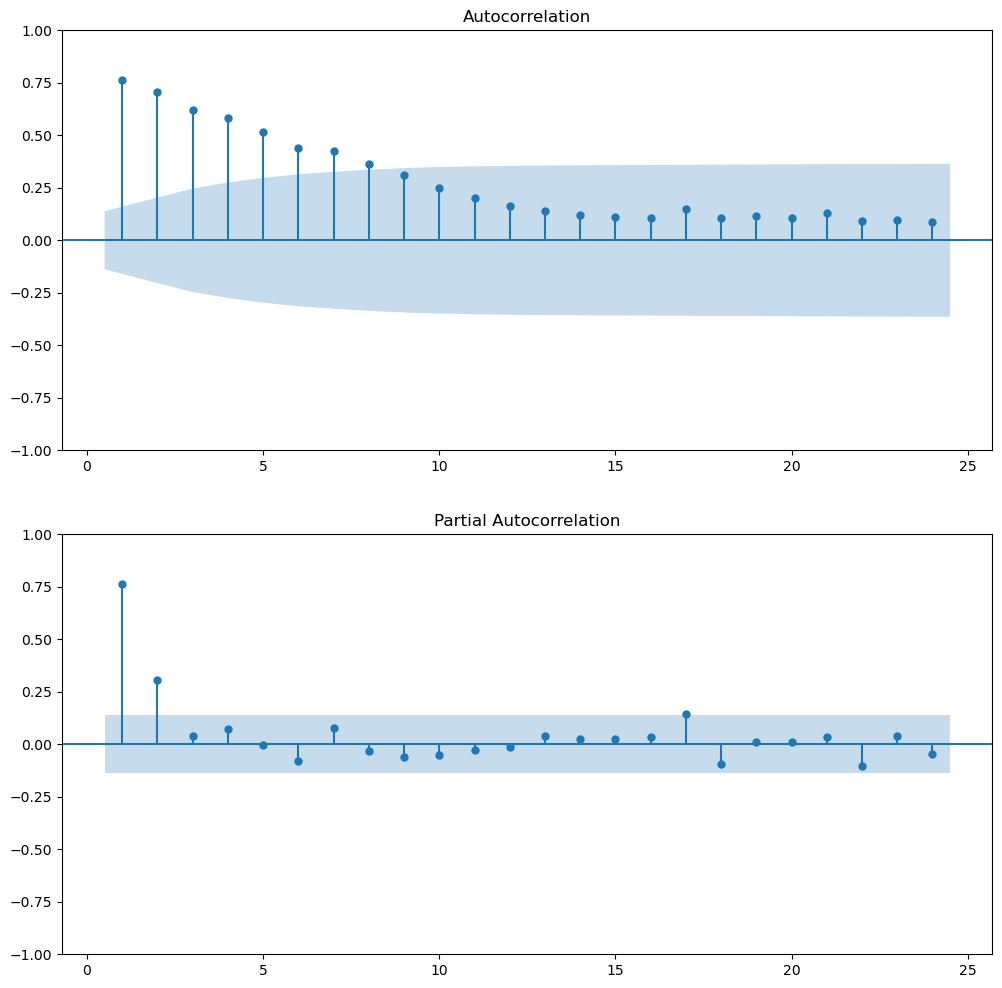

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

plot_acf(ar_ts2, ax1, zero=False)
plot_pacf(ar_ts2, ax2, zero=False)

In [14]:
fit_ar2 = ARIMA(ar_ts2, order=(2,0,0)).fit()

print(fit_ar2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 188.095
Date:                Mon, 30 Sep 2024   AIC                           -368.189
Time:                        10:04:04   BIC                           -354.996
Sample:                    06-01-1983   HQIC                          -362.850
                         - 01-01-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.0241      0.045   2238.957      0.000      99.937     100.112
ar.L1          0.5331      0.071      7.482      0.000       0.393       0.673
ar.L2          0.3310      0.068      4.838      0.0

c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


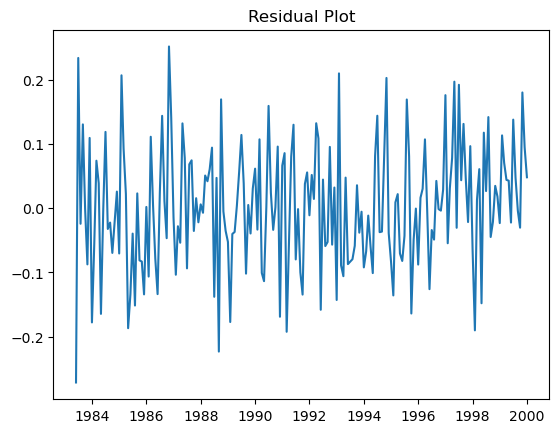

In [16]:
residuals = fit_ar2.resid
plt.plot(residuals)
plt.title('Residual Plot')
plt.show()

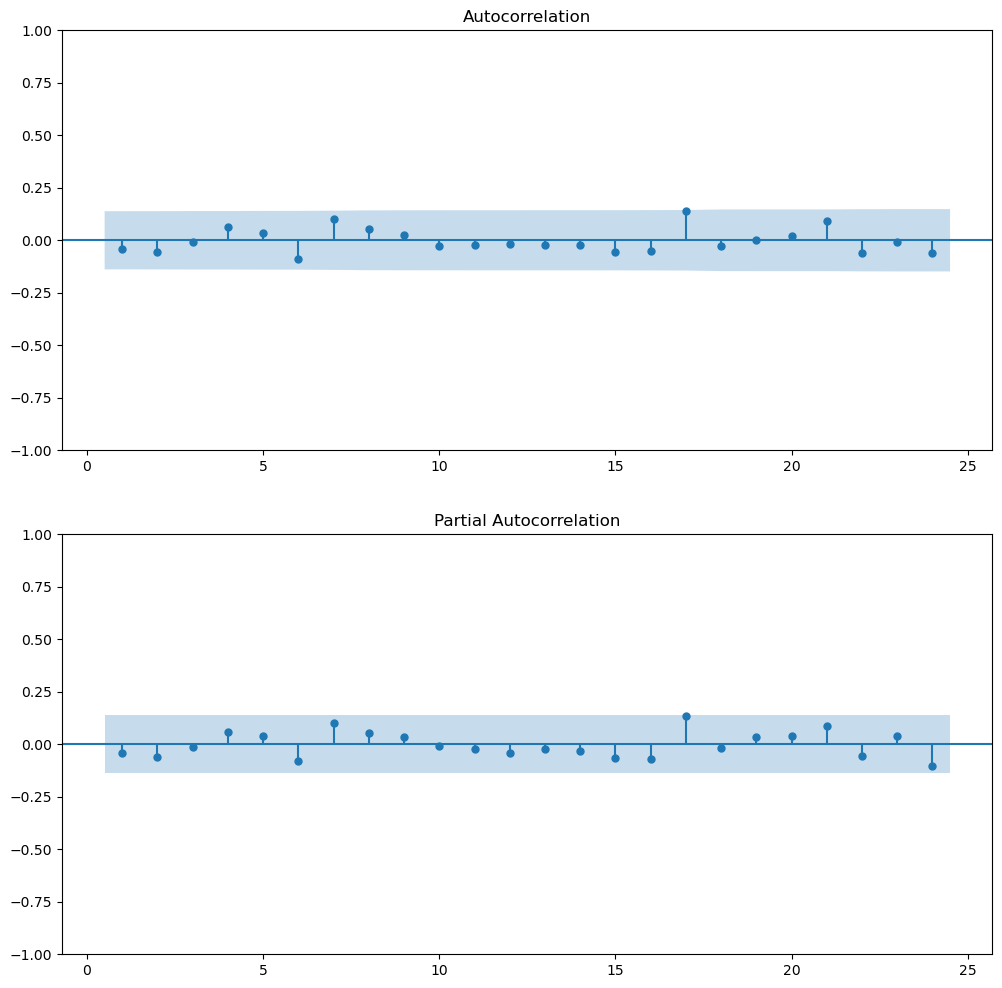

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

plot_acf(residuals, ax=ax1, zero=False)
plot_pacf(residuals, ax=ax2, zero=False)
plt.show()

In [18]:
#Not white noise, then add another term to the model.
sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,6.853878,0.739164
